In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Sử dụng thuật toán K-means để phân loại các cầu thủ thành các nhóm có chỉ số giống nhau. 

In [7]:
df= pd.read_csv('result.csv')
df.head(10)

,Unnamed: 0,player,nationality,position,team,age,games,games_starts,minutes,assists,...,gk_wins,gk_ties,gk_losses,gk_clean_sheets,gk_clean_sheets_pct,gk_pens_att,gk_pens_allowed,gk_pens_saved,gk_pens_missed,gk_pens_save_pct
0,0,Max Aarons,eng,DF,Bournemouth,23,20,13,1237,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Tyler Adams,us,MF,Bournemouth,24,3,1,121,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Tosin Adarabioyo,eng,DF,Fulham,25,20,18,1617,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Elijah Adebayo,eng,FW,Luton Town,25,27,16,1419,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Simon Adingra,ci,FW,Brighton,21,31,25,2222,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Nayef Aguerd,ma,DF,West Ham,27,21,21,1857,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8,Naouirou Ahamada,fr,"MF,FW",Crystal Palace,21,20,0,349,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9,Anel Ahmedhodžić,ba,DF,Sheffield Utd,24,31,29,2649,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10,Ola Aina,ng,DF,Nott'ham Forest,26,22,20,1692,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11,Rayan Aït-Nouri,dz,"DF,MF",Wolves,22,33,29,2329,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df1 = df.copy()
for x in df1.columns:
    if type(x) == str:
        lableEncoder = LabelEncoder()
        df1[x] =lableEncoder.fit_transform(df1[x])
    else:
        df1[x].fillna(df1[x].mean(),inplace=True)
standardScaler = StandardScaler()
df1=standardScaler.fit_transform(df1)
df1

array([[-1.72854108,  0.57606062, -0.40611974, ...,  0.28051133,
         0.28178597,  0.24021833],
       [-1.72151449,  1.52132248,  2.03555138, ...,  0.28051133,
         0.28178597,  0.24021833],
       [-1.7144879 ,  1.49289355, -0.40611974, ...,  0.28051133,
         0.28178597,  0.24021833],
       ...,
       [ 1.7144879 ,  0.88877883,  1.97294443, ...,  0.28051133,
         0.28178597,  0.24021833],
       [ 1.72151449,  0.18516286, -0.28090584, ...,  0.28051133,
         0.28178597,  0.24021833],
       [ 1.72854108,  0.46945214,  1.0964471 , ...,  0.28051133,
         0.28178597,  0.24021833]])

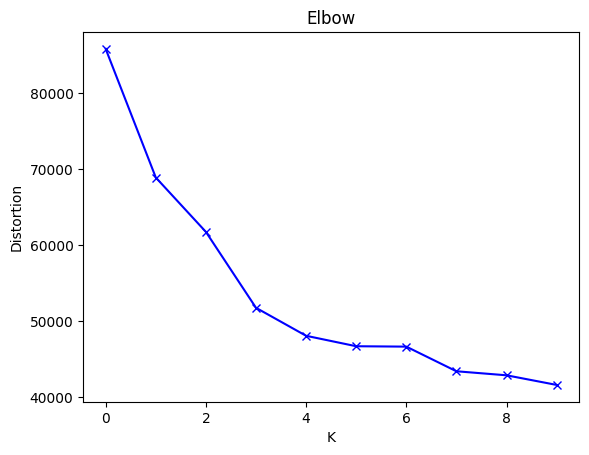

In [9]:
distortions=[] 
for K in range(1,11):
    kmeanModel =KMeans(n_clusters=K) 
    kmeanModel.fit(df1)
    distortions.append(kmeanModel.inertia_)
plt.plot(range(10),distortions,'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow')
plt.show()

Từ hình vẽ  => chia thành 5 cụm 

### Sử dụng thuật toán pca để giảm chiều dữ liệu

In [19]:
# phân loại thành 5 cụm
model = KMeans( n_clusters= 5)
ans =model.fit_predict(df1)

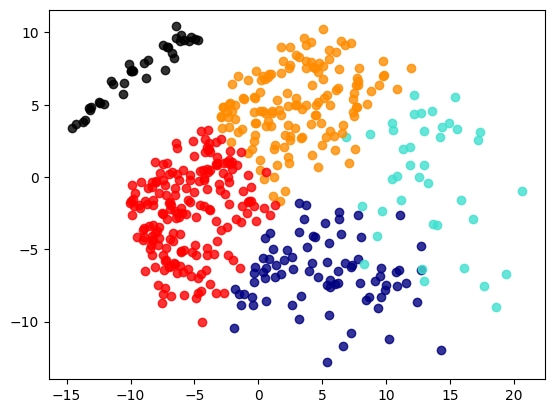

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(df1).transform(df1)

plt.figure()
colors = ['navy','turquoise','darkorange','red','black']

for color, i in zip(colors, [0,1,2,3,4]):
    plt.scatter(X_r[ans == i, 0], X_r[ans == i, 1], color = color, alpha = 0.8, lw = 1)
    


In [22]:
ans

array([3, 3, 2, 0, 0, 2, 3, 2, 2, 2, 2, 2, 2, 1, 4, 0, 2, 1, 0, 2, 2, 3,
       3, 0, 0, 3, 0, 4, 3, 3, 3, 0, 2, 0, 3, 2, 3, 3, 1, 0, 3, 2, 2, 3,
       3, 3, 2, 4, 3, 2, 3, 0, 2, 3, 2, 3, 2, 2, 2, 0, 3, 2, 0, 3, 3, 3,
       3, 3, 2, 0, 3, 3, 3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       0, 1, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 0, 3, 3, 2, 3, 2, 3, 3,
       2, 3, 2, 1, 3, 3, 0, 3, 2, 0, 3, 2, 2, 2, 3, 3, 0, 2, 0, 3, 1, 2,
       3, 4, 2, 3, 4, 0, 3, 3, 0, 0, 2, 3, 2, 3, 2, 2, 2, 1, 4, 3, 3, 3,
       1, 1, 3, 4, 1, 4, 3, 0, 3, 3, 0, 1, 2, 0, 1, 3, 1, 3, 3, 2, 3, 3,
       2, 2, 2, 1, 3, 4, 0, 1, 2, 1, 2, 2, 0, 3, 1, 0, 3, 0, 2, 0, 4, 3,
       0, 3, 3, 3, 0, 2, 2, 0, 2, 3, 3, 0, 3, 0, 0, 3, 2, 1, 0, 0, 0, 2,
       3, 3, 0, 3, 4, 2, 3, 0, 3, 3, 2, 3, 2, 3, 4, 3, 4, 2, 2, 2, 3, 0,
       3, 2, 2, 3, 2, 3, 0, 1, 3, 3, 3, 3, 2, 2, 4, 2, 3, 0, 2, 2, 3, 3,
       2, 3, 1, 3, 3, 1, 1, 0, 2, 2, 2, 2, 3, 3, 3, 0, 4, 3, 2, 0, 3, 0,
       3, 2, 0, 0, 0, 1, 3, 1, 2, 3, 3, 2, 3, 3, 3,

### Vẽ biểu đồ radar

In [12]:
import string

# chuẩn hóa min max
def normalize(value:list, max_val:list,min_val:list) -> list:
    target= []
    for min_v,v,max_v in zip(min_val,value,max_val):
        target.append((v-min_v)/(max_v-min_v))
    return target
def draw_radar_chart(player1:string, player2:string, att:list) -> None:

    # lấy giá trị min max các cột
    min_att=[]
    max_att=[]
    for x in att:
        min_att.append(df[x].min())
        max_att.append(df[x].max())
    min_att.append(min_att[0])
    max_att.append(max_att[0])
    # lấy chỉ số 2 cầu thủ và chuẩn hóa chỉ số
    att_p1= np.array(df[df['player']== player1][att])[0]
    att_p1= np.append(att_p1,att_p1[0])
    att1= normalize(att_p1.tolist(),max_att,min_att)
    
    att_p2= np.array(df[df['player']== player2][att])[0]
    att_p2= np.append(att_p2,att_p2[0])
    att2= normalize(att_p2.tolist(),max_att,min_att)

    # vẽ biểu đồ
    circle = np.linspace(0,2*np.pi,len(att),endpoint=False)
    circle_close= np.append(circle,0)
    ax = plt.subplot(polar=True)
    plt.yticks([0.2,0.4,0.6,0.8,1],['0.2','0.4','0.6','0.8','1'])
    plt.ylim(0,1)
    plt.xticks(circle,att)
    ax.plot(circle_close,att1,label = player1)
    ax.plot(circle_close,att2,label = player2)
    ax.legend(loc='center left',bbox_to_anchor=(1.2,0.7))
    plt.show()

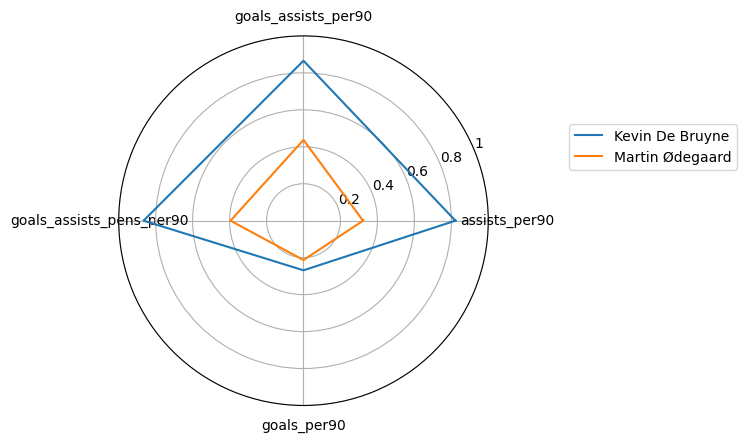

In [13]:
draw_radar_chart('Kevin De Bruyne','Martin Ødegaard',['assists_per90', 'goals_assists_per90', 'goals_assists_pens_per90','goals_per90'])